# Machine learning Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([2,4,5,4,5,np.NaN,4,np.NaN])

In [3]:
x

array([1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
y

array([ 2.,  4.,  5.,  4.,  5., nan,  4., nan])

### Problem 
find out the missing positions in y (according to a patterns).

It is a labelled data, so for that apply supervised machine learning(type)
in this type there are two variable (dependent/independent)
x(independent) & y(dependent)
so we need to find out the mapping between the x & y,by using the statistcial part.

to find out statistical mapping use visualization 

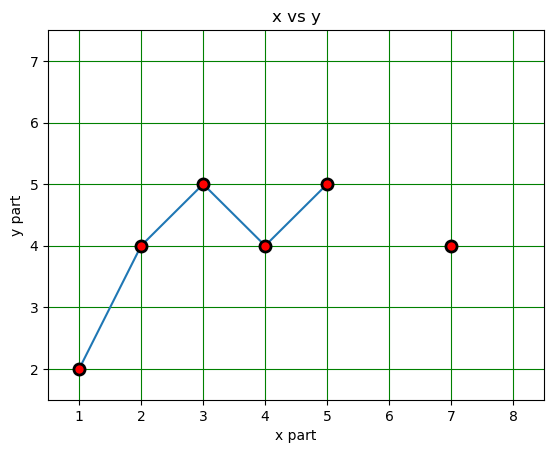

In [5]:
plt.title("x vs y")
plt.plot(x,y,marker = 'o',mfc = "red",mec = "black",mew = "2",ms = 8)
plt.xlabel('x part')
plt.ylabel('y part')
plt.xlim(0.5,8.5)
plt.ylim(1.5,7.5)
plt.grid(color = "green")
plt.show()

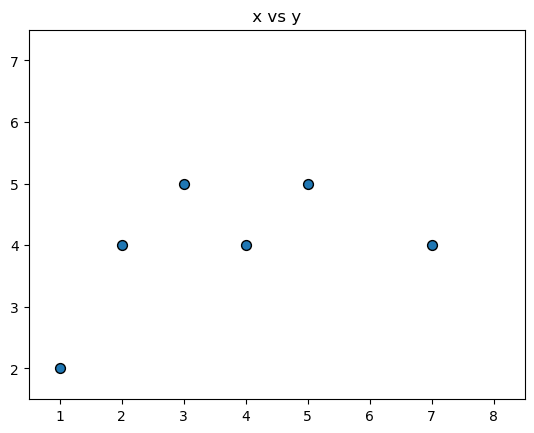

In [6]:
plt.title(" x vs y ")
plt.scatter(x,y,ec = "black",s = 50)
plt.xlim(0.5,8.5)
plt.ylim(1.5,7.5)
plt.show()

if we see visualize the line(staright line between the points),is line nothing but the 
regression formula i.e  y = mx + c
so need to slove this equation to create a m/c learning model.

for doing  statistics we here do, for that have pkg sci-kit,but this we do normal methods(as for the model needs the dataframe and without NaN values)

##### calculating  m have formula
m = summation (x - mean(x)) (y-mean(y)) / (x - mean(x))sq 

In [8]:
df = pd.DataFrame({
    'x' : [1,2,3,4,5,6,7,8],
    'y' : [2,4,5,4,5,np.NaN,4,np.NaN]
})

In [9]:
df

,x,y
0,1,2.0
1,2,4.0
2,3,5.0
3,4,4.0
4,5,5.0
5,6,NaN
6,7,4.0
7,8,NaN


In [10]:
df['x'].mean()

4.5

In [11]:
df['x']-df['x'].mean()

0   -3.5
1   -2.5
2   -1.5
3   -0.5
4    0.5
5    1.5
6    2.5
7    3.5
Name: x, dtype: float64

In [12]:
df['y'].mean()

4.0

In [13]:
df['y']-df['y'].mean()

0   -2.0
1    0.0
2    1.0
3    0.0
4    1.0
5    NaN
6    0.0
7    NaN
Name: y, dtype: float64

In [14]:
up = ((df['x']-df['x'].mean())*(df['y']-df['y'].mean())).sum()
up

6.0

In [15]:
(df['x']-df['x'].mean())*(df['x']-df['x'].mean())


0    12.25
1     6.25
2     2.25
3     0.25
4     0.25
5     2.25
6     6.25
7    12.25
Name: x, dtype: float64

In [16]:
lp = ((df['x']-df['x'].mean())*(df['x']-df['x'].mean())).sum()
lp

42.0

In [17]:
m = up / lp
m

0.14285714285714285

In [18]:
6/42

0.14285714285714285

#### now calculate the 'c' (intercept) here
y = mx + c 
put x as x.mean() and y as y.mean()
c = y - mx


In [19]:
c = df['y'].mean() - m * (df['x'].mean())

In [20]:
c

3.357142857142857

In [21]:
m , c

(0.14285714285714285, 3.357142857142857)

In [26]:
#calculate value for 6 & 8
y5 = (m * 5 + c)
y7 = (m * 7 + c)
y5, y7

(4.071428571428571, 4.357142857142858)

In [27]:
#replace the NaN values in y by above eqn
df['y'][5] = m * df['x'][5]
df['y'][7] = m * df['x'][7]

C:\Users\CHETAN\AppData\Local\Temp\ipykernel_12972\1920634893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][5] = m * df['x'][5]
C:\Users\CHETAN\AppData\Local\Temp\ipykernel_12972\1920634893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][7] = m * df['x'][7]


In [28]:
df

,x,y
0,1,2.000000
1,2,4.000000
2,3,5.000000
3,4,4.000000
4,5,5.000000
5,6,0.857143
6,7,1.000000
7,8,1.142857


In [93]:
#now as we fill the NaN values ,let's check by linear regression m/c learning model

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
model = LinearRegression()

In [131]:
xi = df[['x']]

In [132]:
yi = df['y']

In [133]:
model.fit(xi,yi)

LinearRegression()

In [134]:
inp = int(input("Enter the value of x : "))
model.predict([[inp]])

Enter the value of x :  5


C:\Users\CHETAN\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.1462585])

In [143]:
model.predict(x)

array([3.97619048, 3.76870748, 3.56122449, 3.3537415 , 3.1462585 ,
       2.93877551, 2.73129252, 2.52380952])

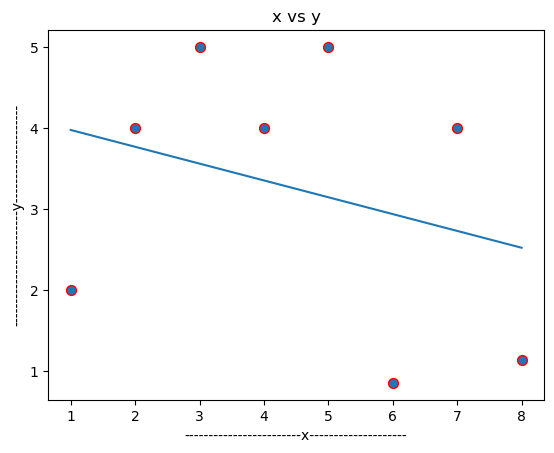

In [177]:
plt.title('x vs y')
plt.scatter(x,y,s = 50, ec = 'red')
plt.xlabel('------------------------x--------------------')
plt.ylabel('------------------------y--------------------')
plt.plot(x,model.predict(x))
plt.show()